# Case Study: Covid-19 Data Analysis

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#importing the dataset
dataset = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science Course\DS Projects\covid19_Confirmed_dataset.csv', index_col=0)
dataset.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
dataset.shape

(266, 103)

In [18]:
#deleting the useless columns
df = dataset.drop(["Lat","Long"], axis=1, inplace=True)

In [20]:
dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
NaN,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
NaN,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
NaN,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
NaN,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [22]:
#aggregate the rows by country
corona_dataset_aggreg= dataset.groupby('Country/Region').sum()
corona_dataset_aggreg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [23]:
corona_dataset_aggreg.shape

(187, 100)

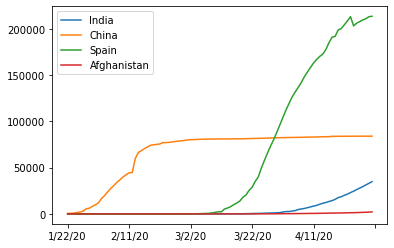

In [25]:
#visualize data related to a country
corona_dataset_aggreg.loc['India'].plot()
corona_dataset_aggreg.loc['China'].plot()
corona_dataset_aggreg.loc['Spain'].plot()
corona_dataset_aggreg.loc['Afghanistan'].plot()
plt.legend()

<AxesSubplot:>

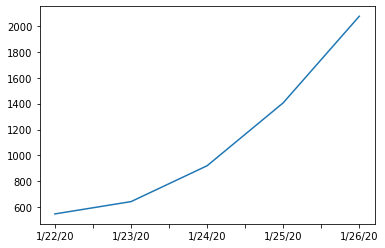

In [28]:
#calculate a good measure
corona_dataset_aggreg.loc['China'][:5].plot()

<AxesSubplot:>

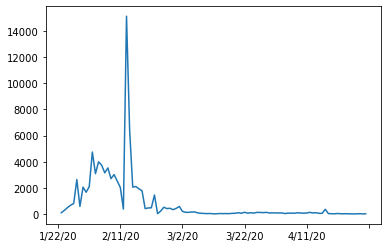

In [30]:
#calculate the first derivative of the curve
corona_dataset_aggreg.loc['China'].diff().plot()

In [31]:
#maximum infection rate for a particular coountry
corona_dataset_aggreg.loc['India'].diff().max()

1893.0

In [32]:
print(corona_dataset_aggreg.loc['China'].diff().max())
print(corona_dataset_aggreg.loc['Spain'].diff().max())

15136.0
9630.0


In [34]:
#maximum infection rate for all the countries
countries= list(corona_dataset_aggreg.index)
max_infect_rates=[]

for c in countries:
    max_infect_rates.append(corona_dataset_aggreg.loc[c].diff().max())

corona_dataset_aggreg['Maximum Infection Rates']= max_infect_rates

In [35]:
corona_dataset_aggreg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Maximum Infection Rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [36]:
#creating a new dataframe
corona_data= pd.DataFrame(corona_dataset_aggreg['Maximum Infection Rates'])

In [37]:
corona_data

,Maximum Infection Rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [84]:
#importing the world happiness dataset
happiness_report= pd.read_csv(r"C:\Users\Lenovo\Desktop\Data Science Course\DS Projects\worldwide_happiness_report.csv")

In [85]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [86]:
#dropping the useless columns
useless_cols=['Generosity', 'Score', 'Perceptions of corruption']

In [87]:
happiness_report.drop(useless_cols, axis=1, inplace=True)

In [88]:
happiness_report.head()

,Overall rank,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1,Finland,1.340,1.587,0.986,0.596
1,2,Denmark,1.383,1.573,0.996,0.592
2,3,Norway,1.488,1.582,1.028,0.603
3,4,Iceland,1.380,1.624,1.026,0.591
4,5,Netherlands,1.396,1.522,0.999,0.557


In [89]:
happiness_report.set_index('Country or region', inplace=True)
happiness_report.head()

,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,1,1.340,1.587,0.986,0.596
Denmark,2,1.383,1.573,0.996,0.592
Norway,3,1.488,1.582,1.028,0.603
Iceland,4,1.380,1.624,1.026,0.591
Netherlands,5,1.396,1.522,0.999,0.557


In [90]:
corona_data.shape

(187, 1)

In [91]:
happiness_report.shape

(156, 5)

In [94]:
#join the datasets
data= corona_data.join(happiness_report, how='inner')
data

,Maximum Infection Rates,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,154,0.350,0.517,0.361,0.000
Albania,34.0,107,0.947,0.848,0.874,0.383
Algeria,199.0,88,1.002,1.160,0.785,0.086
Argentina,291.0,47,1.092,1.432,0.881,0.471
Armenia,134.0,116,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,108,0.960,1.427,0.805,0.154
Vietnam,19.0,94,0.741,1.346,0.851,0.543
Yemen,5.0,151,0.287,1.163,0.463,0.143
Zambia,9.0,138,0.578,1.058,0.426,0.431


In [95]:
#correlation matrix
data.corr()

,Maximum Infection Rates,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum Infection Rates,1.000000,-0.244777,0.250118,0.191958,0.289263,0.078196
Overall rank,-0.244777,1.000000,-0.802204,-0.780955,-0.804753,-0.570490
GDP per capita,0.250118,-0.802204,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,-0.780955,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,-0.804753,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,-0.570490,0.394603,0.456246,0.427892,1.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum Infection Rates'>

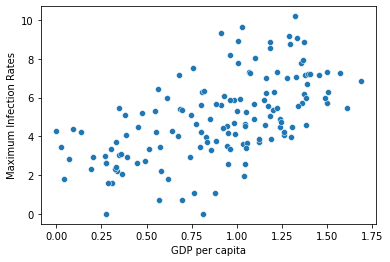

In [96]:
#visualizing
x=data['GDP per capita']
y= data['Maximum Infection Rates']
sns.scatterplot(x,np.log(y)) #log scaling

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum Infection Rates'>

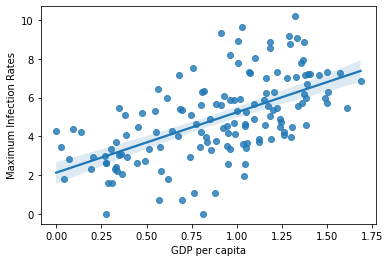

In [97]:
sns.regplot(x, np.log(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Maximum Infection Rates'>

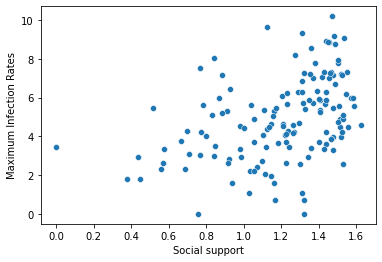

In [99]:
x1=data['Social support']
sns.scatterplot(x1,np.log(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Maximum Infection Rates'>

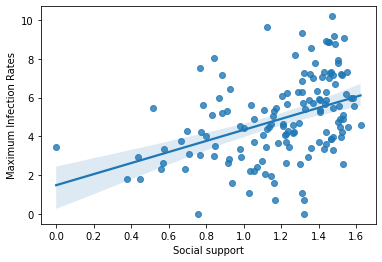

In [100]:
sns.regplot(x1,np.log(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Maximum Infection Rates'>

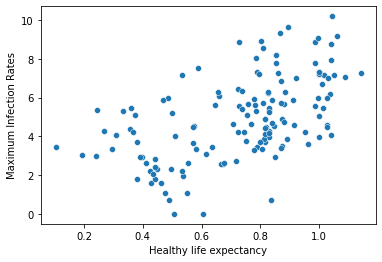

In [101]:
x2=data['Healthy life expectancy']
sns.scatterplot(x2,np.log(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Maximum Infection Rates'>

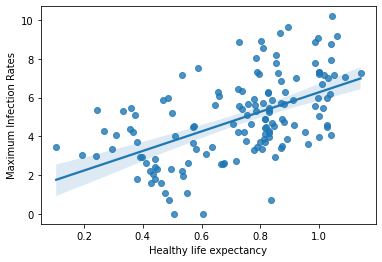

In [102]:
sns.regplot(x2,np.log(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Maximum Infection Rates'>

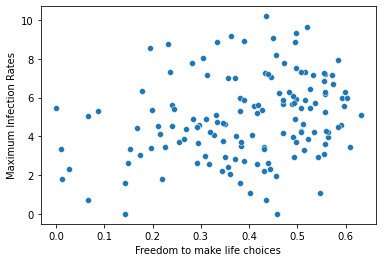

In [103]:
x3=data['Freedom to make life choices']
sns.scatterplot(x3,np.log(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Maximum Infection Rates'>

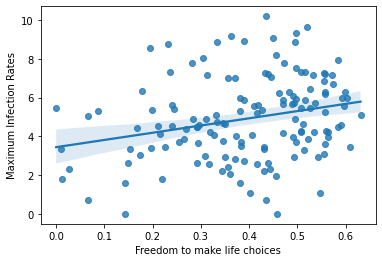

In [104]:
sns.regplot(x3,np.log(y))


#### Thus, we can conclude that there is a positive correlation between the following:
1) GDP per capita and Maximum infection rate

2) Social support and Maximum infection rate

3) Healthy life expectancy and Maximum infection rate

4) Freedom to make life choices and Maximum infection rate